Temp   -6.3
dtype: float64 Temp    39.2
dtype: float64


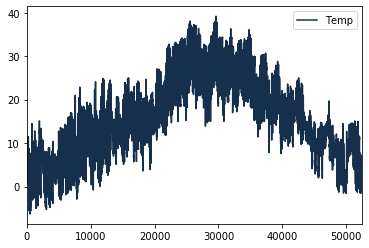

In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns

temp=pd.read_csv("hourlydataOspitaletto.csv" ,squeeze=True)
df=DataFrame(temp,columns=["Temp"])
mypalette = sns.color_palette(['#162f4d']) # https://www.hsluv.org/
sns.set_palette(mypalette)

df.loc[df['Temp'] == -999, 'Temp'] = 15

df.plot()

print(df.min(),df.max())



In [2]:
import seaborn as sns

df=pd.read_csv("hourlydataOspitaletto.csv",index_col=0, parse_dates=True)

df['Data-Ora'] =pd.to_datetime(df['Data-Ora'], infer_datetime_format=True) #Estoy asociando el index de tiempo a la columna Data-Ora

df=df.set_index('Data-Ora')

df.loc[df['Temp'] == -999, 'Temp'] = 14.9 #Sustituye los valores -999 por el promedio



,Temp
Data-Ora,
2019-01-01 00:00:00,9.100000
2019-01-01 01:00:00,9.200000
2019-01-01 02:00:00,9.166667
2019-01-01 03:00:00,9.183333
2019-01-01 04:00:00,8.916667
...,...
2019-12-30 20:00:00,0.733333
2019-12-30 21:00:00,-0.100000
2019-12-30 22:00:00,-0.250000


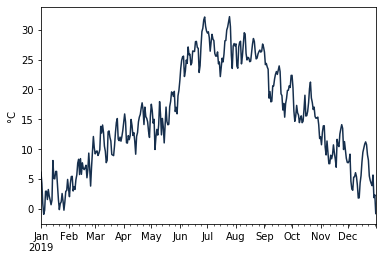

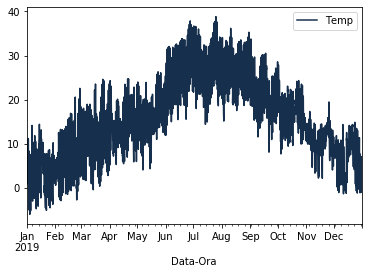

In [3]:
monthly_df=df["Temp"].resample('D').mean().plot() #Ambient temperature resolucion diaria

Tamb_h=df["Temp"].resample('H').mean()
Tamb_hourly=pd.DataFrame(Tamb_h) #Ambient temperature on an hourly resolution

hourly_plot=Tamb_hourly.plot()
monthly_df.set_ylabel("°C")
monthly_df.set_xlabel("")
mypalette = sns.color_palette(['#ff91ff']) # https://www.hsluv.org/
sns.set_palette(mypalette)


Tamb_h #Outdoor temperature
Tamb_hourly

In [4]:
Tamb_hourly.columns

Index(['Temp'], dtype='object')

In [103]:
Tamb_hourly.head(24)

,Data-Ora,Temp,Tsh,Ts1,Ts2,Tnet,Tdhw,Tuser,Taq
0,2019-01-01 00:00:00,9.100000,46.250000,25.0,20.0,25.0,57.0,46.465000,15.363752
1,2019-01-01 01:00:00,9.200000,46.250000,25.0,20.0,25.0,57.0,46.465000,15.363752
2,2019-01-01 02:00:00,9.166667,46.250000,25.0,20.0,25.0,57.0,46.465000,15.363752
3,2019-01-01 03:00:00,9.183333,46.250000,25.0,20.0,25.0,57.0,46.465000,15.363752
4,2019-01-01 04:00:00,8.916667,46.250000,25.0,20.0,25.0,57.0,46.465000,15.363752
5,2019-01-01 05:00:00,8.083333,46.250000,25.0,20.0,25.0,57.0,46.465000,15.363752
6,2019-01-01 06:00:00,7.766667,46.250000,25.0,20.0,25.0,57.0,46.465000,15.363752
7,2019-01-01 07:00:00,7.033333,46.639288,25.0,20.0,25.0,57.0,46.846502,15.363752
8,2019-01-01 08:00:00,6.316667,47.926934,25.0,20.0,25.0,57.0,48.108395,15.363752
9,2019-01-01 09:00:00,6.216667,48.106605,25.0,20.0,25.0,57.0,48.284473,15.363752


In [58]:
Tamb_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 7 columns):
Data-Ora    8737 non-null datetime64[ns]
Temp        8737 non-null float64
Tsh         8737 non-null float64
Ts1         8737 non-null float64
Ts2         8737 non-null float64
Tnet        8737 non-null object
Tdhw        8737 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 477.9+ KB


In [6]:
Tamb_hourly.reset_index(inplace=True)

In [7]:
Tmin_i = float(input("Enter min setpoint temperature: "))
Tmax_i = float(input("Enter max setpoint temperature: "))

Enter min setpoint temperature: 46.25
Enter max setpoint temperature: 55


In [8]:
def climatic_curve(Tamb_h):
    Tmin_o = 2.38 #minimum outdoor T threshold in which the space heating system turns on
    Tmax_o = 7.25 #maximum outdoor T threshold in which the space heating system turns off

    if Tamb_h <= Tmin_o:   
        Tsh = Tmax_i
    elif Tamb_h >= Tmax_o:
        Tsh = Tmin_i
    else:
        m = (Tmax_i-Tmin_i)/(Tmin_o-Tmax_o)
        b = -m*Tmin_o+Tmax_i
        Tsh = m*Tamb_h+b
    return Tsh
 

In [9]:
Tamb_hourly['Tsh'] = Tamb_hourly['Temp'].apply(lambda x: climatic_curve(x))

In [56]:
Tdhw = float(input("Enter domestic hot water temperature: "))

Tamb_hourly["Tdhw"] =Tdhw

Enter domestic hot water temperature: 57


In [60]:
def Tuser(fila):
    Tsh=fila["Tsh"]
    Tdhw=fila["Tdhw"]
    fecha=fila["Data-Ora"]
    #Las proporciones dependen de la localización
    if fecha.month==1:
        resultado= 0.98*Tsh+0.02*Tdhw
    
    elif fecha.month==2:
        resultado=0.96*Tsh+0.04*Tdhw
    
    elif fecha.month==3:
        resultado=0.94*Tsh+0.06*Tdhw
    
    elif fecha.month==4:
        resultado=0.90*Tsh+0.1*Tdhw
    
    elif fecha.month==5:
        resultado=0.75*Tsh+0.25*Tdhw
    
    elif fecha.month==6:
        resultado=0.25*Tsh+0.75*Tdhw
    
    elif fecha.month==7:
        resultado=0*Tsh+1.0*Tdhw
    
    elif fecha.month==8:
        resultado=0*Tsh+1.0*Tdhw
    
    elif fecha.month==9:
        resultado=0.1*Tsh+0.9*Tdhw
    
    elif fecha.month==10:
        resultado=0.80*Tsh+0.2*Tdhw
    
    elif fecha.month==11:
        resultado=0.95*Tsh+0.05*Tdhw
    
    elif fecha.month==12:
        resultado=0.97*Tsh+0.03*Tdhw
        
    return resultado

In [61]:
Tamb_hourly["Tuser"] = Tamb_hourly.apply(Tuser, axis=1)

# Network temperature 

32.17777777777778


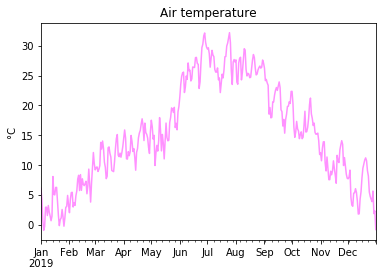

In [89]:
from math import cos, sin, exp, sqrt,pi

monthly_df=df["Temp"].resample('D').mean().plot(title='Air temperature') #Es el mismo grafico con resolucion diaria
monthly_df.set_ylabel("°C")
monthly_df.set_xlabel("")
mypalette = sns.color_palette(['#ff91ff']) # https://www.hsluv.org/
sns.set_palette(mypalette)

#T_daily_avg=df["Temp"].resample('D').mean() #columna de valores promedios en escala de tiempo determinada

T_monthly_avg=df["Temp"].resample('D').mean() #Representa los 365 valores con index fecha
T_monthly_avg=T_monthly_avg.reset_index() #Reseteo el index de fecha por uno por defecto
T_monthly_avg["Data-Ora"]= T_monthly_avg.index+1
#T_monthly_avg=T_monthly_avg.reset_index() #Reseteo el index de fecha por uno por defecto
#T_monthly_avg["Time"]= T_monthly_avg.index+1


T_amb_ave_y=df["Temp"].mean() #Promedio de temperatura de todo el dataset
T_max=T_monthly_avg["Temp"].max() #Maximo de temperatura de todo el dataset
DT_y = T_max-T_amb_ave_y # soil temperature swing Tmax-Tmean
t_0=365*24*3600
t=T_monthly_avg["Data-Ora"] #t represents the number of the day, where t=1-365
T_monthly_avg["Temp"]

t_month=[1,2,3,4,5,6,7,8,9,10,11,12]
t2=pd.Series(t_month)

from math import exp, cos, sqrt, pi, e
zz=1               #Depth [m]
alpha=7e-7      #Ground thermal diffusivity [m^2/s]
dif=0.0000007*3600*24 #Ground thermal diffusivity [m^2/day]

print(T_max)
d_shift=T_monthly_avg["Temp"].idxmin(axis=0) #Indica el día de menor o mayor temperatura de todo el dataset

In [93]:
depth_aquifer= float(input("""Aquifer temperature depth:
"""))

def aquifer_temperature(fila):
    t = fila['Data-Ora'].dayofyear
    T_aq = T_amb_ave_y-DT_y*exp(-depth_aquifer*sqrt(pi/(alpha*t_0)))*cos(2*pi/t_0*(t*24*3600)-d_shift-depth_aquifer/2*sqrt(t_0/(pi*alpha)))
    return  T_aq


Aquifer temperature depth:
30


In [94]:
Taq=Tamb_hourly.apply(aquifer_temperature, axis=1)

In [96]:
Tamb_hourly["Taq"] = Taq

In [101]:
Ts1 = float(input("""Temperature of source 1: 
"""))

Ts2 = float(input("""Temperature of source 2: 
"""))


Temperature of source 1: 
25
Temperature of source 2: 
20


In [102]:
Tamb_hourly['Ts1'] = Ts1

if Ts2 !=0:
    Tamb_hourly["Ts2"] = Ts2
    Tamb_hourly["Tnet"]=  Tamb_hourly[["Ts1", "Ts2"]].max(axis=1) #If s1 and s2 exists, Tnet is equal to the source of highest T
else:
    Tamb_hourly["Ts2"] = Ts2 #If s2 does not exist, Tnet is equal to s1
    Tamb_hourly["Tnet"]=  Ts1

if Ts1 == 0 and Ts2 == 0 :
        Tamb_hourly["Tnet"]= Taq #If neither s1 nor s2 exist


In [ ]:
def probability_dhw_sh(t)
 p_sh_m = [12 items]
 p_dhw_m = [12 items]
 p_sh_i = [24 items]
 p_sh_i = [24 items]

 p_sh_h =12*30*24
 p_dhw_h =12*30*24

return p_sh_h, p_dhw_h

In [ ]:
def user_temperature_level(t)
 Tdhw = input("Enter the average domestic hot water temperature: ")

 T_sh_dhw = Tsh*p_sh_h+Tdhw*p_dhw_h
return T_dh_dsw